# India Coronavirus(Covid-19) EDA,Visualizations and Comparisons

<a></a>
# 1. Introduction 
[](##Dataset_Imports)
<font size="2">The COVID-19 pandemic in India is part of the worldwide pandemic of coronavirus disease 2019 (COVID-19) caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The first case of COVID-19 in India, which originated from China, was reported on 30 January 2020. India currently has the largest number of confirmed cases in Asia and has the second-highest number of confirmed cases in the world after the United States,with the number of total confirmed cases breaching the  31,209,914 confirmed cases on 20 July 2021. On 06 May 2021, India recorded the global highest single-day spike in COVID-19 cases with 4,14,280 cases.

![](https://drive.google.com/uc?export=download&id=1tiSW79M8ERZ_pEKFEhXFZro6xJK8MqNo)


### This notebook aims at exploring COVID-19 situation in India through data analysis and projections.

## Covid-19 Data Sources:
* CSV Datasets [COVID19-India API](https://api.covid19india.org/documentation/csv/)
* Official Sources are [MOHFW](https://www.mohfw.gov.in/), [ICMR](https://icmr.nic.in/node/39071).
* Learn more from [World Health Organization](https://www.who.int/emergencies/diseases/novel-coronavirus-2019)

> <font size="2">Don't PANIC, follow your nation and WHO guidelines.
> Stay safe. Join the cause!</font>

In [1]:
from IPython.core.display import HTML
HTML('''<div class="flourish-embed flourish-cards" data-src="visualisation/1786965" data-url="https://flo.uri.sh/visualisation/1786965/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

## 2. Dataset Imports
<a></a>
Download the dataset from the links provied [here](https://api.covid19india.org/documentation/csv/)
Remember you update this on a daily basis !

In [6]:
#Core Imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Core Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import plot, iplot, init_notebook_mode
import plotly_express as px
init_notebook_mode(connected=True)
from scipy.ndimage.filters import gaussian_filter1d
import datetime
import calendar
%matplotlib inline

In [7]:
df_states = pd.read_csv('https://api.covid19india.org/csv/latest/states.csv') # sate wise daily data
df_states_daily= pd.read_csv('https://api.covid19india.org/csv/latest/state_wise_daily.csv') 
df_districts = pd.read_csv('https://api.covid19india.org/csv/latest/districts.csv')
df_district_wise=pd.read_csv('https://api.covid19india.org/csv/latest/district_wise.csv')

### state_wise_daily 
Statewise timeseries of Confirmed, Recovered and Deceased numbers.
### states
Statewise timeseries of Confirmed, Recovered and Deceased numbers in long format
### districts
Districtwise timeseries of Confirmed, Recovered and Deceased numbers in long format
### district_wise
The latest District-wise situation

In [8]:
df_districts

Date                        State           District  Confirmed  \
0       2020-04-26  Andaman and Nicobar Islands            Unknown         33   
1       2020-04-26               Andhra Pradesh          Anantapur         53   
2       2020-04-26               Andhra Pradesh           Chittoor         73   
3       2020-04-26               Andhra Pradesh      East Godavari         39   
4       2020-04-26               Andhra Pradesh             Guntur        214   
...            ...                          ...                ...        ...   
290790  2021-07-20                  West Bengal    Purba Bardhaman      39670   
290791  2021-07-20                  West Bengal    Purba Medinipur      59891   
290792  2021-07-20                  West Bengal            Purulia      19099   
290793  2021-07-20                  West Bengal  South 24 Parganas      95537   
290794  2021-07-20                  West Bengal     Uttar Dinajpur      19323   

        Recovered  Deceased  Other  Tested  
0              11         0      0     NaN  
1              14         4      0     NaN  
2              13         0      0     NaN  
3              12         0      0     NaN  
4              29         8      0     NaN  
...           ...       ...    ...     ...  
290790      39063       177      0     NaN  
290791      58434       367      0     NaN  
290792      18941       112      0     NaN  
290793      93602      1265      0     NaN  
290794      18936       233      0     NaN  

[290795 rows x 8 columns]

## 3. Data Preprocessing

In [9]:
df_districts.shape

(290795, 8)

totoal 262935 records and 8 columns

In [10]:
df_districts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290795 entries, 0 to 290794
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       290795 non-null  object 
 1   State      290795 non-null  object 
 2   District   290795 non-null  object 
 3   Confirmed  290795 non-null  int64  
 4   Recovered  290795 non-null  int64  
 5   Deceased   290795 non-null  int64  
 6   Other      290795 non-null  int64  
 7   Tested     215284 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 17.7+ MB


In [15]:
df_districts['Date'] = pd.to_datetime(df_districts['Date'],infer_datetime_format=True)
df_districts['Tested']=df_districts['Tested'].fillna(0)

Convert data column into date type & Fill Null values with zeros in Tested column

In [16]:
df_districts[['District','State']]

District                        State
0                 Unknown  Andaman and Nicobar Islands
1               Anantapur               Andhra Pradesh
2                Chittoor               Andhra Pradesh
3           East Godavari               Andhra Pradesh
4                  Guntur               Andhra Pradesh
...                   ...                          ...
262930    Purba Bardhaman                  West Bengal
262931    Purba Medinipur                  West Bengal
262932            Purulia                  West Bengal
262933  South 24 Parganas                  West Bengal
262934     Uttar Dinajpur                  West Bengal

[262935 rows x 2 columns]

Unknown values in District column replace unknow value as prefix state

In [17]:
#if any district value is unknown the prefix the state name
def fill_unknown_distct(x):
    d=x[0]
    s=x[1]
    if (d=='Unknown'):
        return s+'_'+'Unknown'
    return d 

In [18]:
df_districts['District']=df_districts[['District','State']].apply(fill_unknown_distct, axis=1)
df_districts[['District','State']]

District                        State
0       Andaman and Nicobar Islands_Unknown  Andaman and Nicobar Islands
1                                 Anantapur               Andhra Pradesh
2                                  Chittoor               Andhra Pradesh
3                             East Godavari               Andhra Pradesh
4                                    Guntur               Andhra Pradesh
...                                     ...                          ...
262930                      Purba Bardhaman                  West Bengal
262931                      Purba Medinipur                  West Bengal
262932                              Purulia                  West Bengal
262933                    South 24 Parganas                  West Bengal
262934                       Uttar Dinajpur                  West Bengal

[262935 rows x 2 columns]

Preparing districts current date data frame

In [22]:
district_all=np.sort(df_districts['District'].unique())
temp_dis_df=pd.DataFrame(columns = ['Date', 'District', 'Confirmed', 'Recovered', 'Deceased', 'Other',
       'Tested']) 
for i in district_all:
    if(i!='India'):
        dis_data=df_districts[df_districts['District']==i]
        dis_data=dis_data.groupby('Date',as_index=False).last()
        temp_dis_df=temp_dis_df.append(dis_data)

dis_df=temp_dis_df.groupby('District',as_index=True).last()
dis_df.sort_values('Tested',ascending=False)


Date  Confirmed  Recovered  Deceased  Other  \
District                                                                   
Delhi                  2021-06-09    1429791    1400161     24668      0   
Telangana_Unknown      2021-06-09     595000     567285      3409      0   
Assam_Unknown          2021-06-09     442694     388451      3738   1347   
Bengaluru Urban        2021-06-09    1187146    1070062     15118      1   
Mumbai                 2021-06-09     712055     677226     15006   2181   
...                           ...        ...        ...       ...    ...   
Simdega                2021-06-09       6902       6539        91      0   
Lawngtlai              2021-06-09        935        726         0      0   
Lunglei                2021-06-09       1020        780         0      0   
Madhya Pradesh_Unknown 2020-07-05          0          9         1      0   
Agar Malwa             2021-06-09       3280       3183        45      0   

                            Tested           State  
District                                            
Delhi                   19893804.0           Delhi  
Telangana_Unknown       16127372.0       Telangana  
Assam_Unknown           11941949.0           Assam  
Bengaluru Urban          6883888.0       Karnataka  
Mumbai                   2789713.0     Maharashtra  
...                            ...             ...  
Simdega                        0.0       Jharkhand  
Lawngtlai                      0.0         Mizoram  
Lunglei                        0.0         Mizoram  
Madhya Pradesh_Unknown         0.0  Madhya Pradesh  
Agar Malwa                     0.0  Madhya Pradesh  

[661 rows x 7 columns]

In [23]:
dis_df

Date  Confirmed  Recovered  Deceased  Other  \
District                                                               
Agar Malwa         2021-06-09       3280       3183        45      0   
Agra               2021-06-09      25714      25045       434      0   
Ahmedabad          2021-06-09     236738     230621      3370      0   
Ahmednagar         2021-06-09     257252     247819      3495      1   
Airport Quarantine 2021-06-09       2079       2075         2      0   
...                       ...        ...        ...       ...    ...   
Yadgir             2021-06-09      27169      26182       204      0   
Yamunanagar        2021-06-09      24136      23385       365      0   
Yanam              2021-06-09       6342       6027        99      0   
Yavatmal           2021-06-09      75191      72909      1587      4   
Zunheboto          2021-06-09        376        283        12      5   

                       Tested           State  
District                                       
Agar Malwa                0.0  Madhya Pradesh  
Agra                 491361.0   Uttar Pradesh  
Ahmedabad           2556492.0         Gujarat  
Ahmednagar            11077.0     Maharashtra  
Airport Quarantine        0.0      Tamil Nadu  
...                       ...             ...  
Yadgir               221485.0       Karnataka  
Yamunanagar          196131.0         Haryana  
Yanam                 26727.0      Puducherry  
Yavatmal             141551.0     Maharashtra  
Zunheboto              2131.0        Nagaland  

[661 rows x 7 columns]

## Calculating Active , Mortality_rate, Recovery_rate

In [24]:
#calculate  Active 
def fill_active(x):
    conf=x[0]
    rec=x[1]
    dea=x[2]
    return x[0]-(x[2]+x[1])

#calculate mortality rate 

def mortality_rate(x):
    d=x[0]
    c=x[1]
    if c == 0:
        return 0
    else:
        m_rate = round(d/c*100,2)
        return m_rate 

    
#calculate recovery rate
def recovery_rate (x):
    
    conf = x[0]
    rec  = x[1]
    if rec == 0:
        return 0
    else:
        rec_rate = round((rec/conf)*100,2)
        return rec_rate 

In [25]:
dis_df['Active'] =dis_df[['Confirmed','Recovered','Deceased']].apply(fill_active, axis=1)
dis_df['Mortality_rate'] = dis_df[['Deceased','Confirmed']].apply(mortality_rate, axis=1)
dis_df['Recovery_rate']= dis_df[['Confirmed','Recovered']].apply(recovery_rate, axis=1)

In [26]:
dis_df.head(5)

Date  Confirmed  Recovered  Deceased  Other  \
District                                                               
Agar Malwa         2021-06-09       3280       3183        45      0   
Agra               2021-06-09      25714      25045       434      0   
Ahmedabad          2021-06-09     236738     230621      3370      0   
Ahmednagar         2021-06-09     257252     247819      3495      1   
Airport Quarantine 2021-06-09       2079       2075         2      0   

                       Tested           State  Active  Mortality_rate  \
District                                                                
Agar Malwa                0.0  Madhya Pradesh      52            1.37   
Agra                 491361.0   Uttar Pradesh     235            1.69   
Ahmedabad           2556492.0         Gujarat    2747            1.42   
Ahmednagar            11077.0     Maharashtra    5938            1.36   
Airport Quarantine        0.0      Tamil Nadu       2            0.10   

                    Recovery_rate  
District                           
Agar Malwa                  97.04  
Agra                        97.40  
Ahmedabad                   97.42  
Ahmednagar                  96.33  
Airport Quarantine          99.81

In [29]:
df_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16347 entries, 0 to 16346
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       16347 non-null  object 
 1   State      16347 non-null  object 
 2   Confirmed  16347 non-null  int64  
 3   Recovered  16347 non-null  int64  
 4   Deceased   16347 non-null  int64  
 5   Other      16347 non-null  int64  
 6   Tested     15593 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 894.1+ KB


In [30]:
#change the date data type
df_states['Date']=pd.to_datetime(df_states['Date'],infer_datetime_format=True)
df_states['Tested']=df_states['Tested'].fillna(0)

In [31]:
df_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16347 entries, 0 to 16346
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       16347 non-null  datetime64[ns]
 1   State      16347 non-null  object        
 2   Confirmed  16347 non-null  int64         
 3   Recovered  16347 non-null  int64         
 4   Deceased   16347 non-null  int64         
 5   Other      16347 non-null  int64         
 6   Tested     16347 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 894.1+ KB


In [32]:
#gather unique state names 
states_all=np.sort(df_states['State'].unique())
states_all

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'India',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'State Unassigned', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'], dtype=object)

In [34]:
df_state = pd.DataFrame(columns = ['Date', 'State', 'Confirmed', 'Recovered', 'Deceased', 'Other',
       'Tested']) 

#prepare states data 
for i in states_all:
    if (i!='India'):
        state_data = df_states[df_states['State']==i]
        state_data = state_data.groupby ('Date', as_index=False).last()
        df_state= df_state.append(state_data)


In [35]:
df_state['Active'] =  df_state[['Confirmed','Recovered','Deceased']].apply(fill_active , axis=1)
df_state['Mortality_rate'] = df_state[['Deceased','Confirmed']].apply(mortality_rate, axis=1)
df_state['Recovery_rate'] = df_state[['Confirmed','Recovered']].apply(recovery_rate, axis=1) 

In [36]:
df_state.shape

(15878, 10)

In [37]:
df_state

Date                        State Confirmed Recovered Deceased  \
0   2020-03-26  Andaman and Nicobar Islands         1         0        0   
1   2020-03-27  Andaman and Nicobar Islands         6         0        0   
2   2020-03-28  Andaman and Nicobar Islands         9         0        0   
3   2020-03-29  Andaman and Nicobar Islands         9         0        0   
4   2020-03-30  Andaman and Nicobar Islands        10         0        0   
..         ...                          ...       ...       ...      ...   
445 2021-06-05                  West Bengal   1419130   1358537    16152   
446 2021-06-06                  West Bengal   1426132   1374419    16259   
447 2021-06-07                  West Bengal   1432019   1388771    16362   
448 2021-06-08                  West Bengal   1437446   1401061    16460   
449 2021-06-09                  West Bengal   1437446   1401061    16460   

    Other      Tested  Active  Mortality_rate  Recovery_rate  
0       0         0.0       1            0.00           0.00  
1       0         0.0       6            0.00           0.00  
2       0         0.0       9            0.00           0.00  
3       0         0.0       9            0.00           0.00  
4       0         0.0      10            0.00           0.00  
..    ...         ...     ...             ...            ...  
445     0  12789625.0   44441            1.14          95.73  
446     0  12859678.0   35454            1.14          96.37  
447     0  12919787.0   26886            1.14          96.98  
448     0  12979963.0   19925            1.15          97.47  
449     0  12979963.0   19925            1.15          97.47  

[15878 rows x 10 columns]

In [39]:
df_state=df_state[df_state['State'] != 'State Unassigned'] # excluding data with no state name
df_india = df_states[df_states['State']== 'India']  #preparing india dataset

In [40]:
#preparing data month wise
df_india['Date']=pd.to_datetime(df_india['Date'],infer_datetime_format=True).dt.to_period('m')

#aggregating data into monthwise
df_india=df_india.groupby('Date',as_index=False).last()

In [41]:
df_india.head()

Date  State  Confirmed  Recovered  Deceased  Other     Tested
0  2020-01  India          1          0         0      0        0.0
1  2020-02  India          3          3         0      0        0.0
2  2020-03  India       1635        160        47      3    42788.0
3  2020-04  India      34867       9059      1154      4   902654.0
4  2020-05  India     190648      91862      5405     13  3837207.0

In [43]:
df_india.shape

(18, 7)

In [44]:
df_india['Active'] =  df_india[['Confirmed','Recovered','Deceased']].apply(fill_active , axis=1)
df_india['Mortality_rate'] = df_india[['Deceased','Confirmed']].apply(mortality_rate, axis=1)
df_india['Recovery_rate'] = df_india[['Confirmed','Recovered']].apply(recovery_rate, axis=1) 

In [45]:
def change(x):
    return x.strftime('%b-%Y')

In [46]:
df_india['Date']=df_india['Date'].apply(change) # chaginf the month format

In [47]:
df_india

Date  State  Confirmed  Recovered  Deceased  Other       Tested  \
0   Jan-2020  India          1          0         0      0          0.0   
1   Feb-2020  India          3          3         0      0          0.0   
2   Mar-2020  India       1635        160        47      3      42788.0   
3   Apr-2020  India      34867       9059      1154      4     902654.0   
4   May-2020  India     190648      91862      5405     13    3837207.0   
5   Jun-2020  India     585791     347841     17410     67    8826585.0   
6   Jul-2020  India    1697054    1095549     36556    421   19358659.0   
7   Aug-2020  India    3687942    2837381     65435    585   43324834.0   
8   Sep-2020  India    6310266    5270015     98708    900   75619781.0   
9   Oct-2020  India    8183396    7489593    122151   1428  109887303.0   
10  Nov-2020  India    9463256    8888595    137659   2194  141349301.0   
11  Dec-2020  India   10286312    9881732    149018   2861  173111694.0   
12  Jan-2021  India   10758629   10434007    154428   4509  197092635.0   
13  Feb-2021  India   11112057   10784568    157194   4578  216858774.0   
14  Mar-2021  India   12220717   11472500    162960   4870  244798621.0   
15  Apr-2021  India   19157196   15673250    211839   8293  288337385.0   
16  May-2021  India   28173883   25939750    331911  11273  346792257.0   
17  Jun-2021  India   29096415   27498939    353626  11651  370193563.0   

     Active  Mortality_rate  Recovery_rate  
0         1            0.00           0.00  
1         0            0.00         100.00  
2      1428            2.87           9.79  
3     24654            3.31          25.98  
4     93381            2.84          48.18  
5    220540            2.97          59.38  
6    564949            2.15          64.56  
7    785126            1.77          76.94  
8    941543            1.56          83.51  
9    571652            1.49          91.52  
10   437002            1.45          93.93  
11   255562            1.45          96.07  
12   170194            1.44          96.98  
13   170295            1.41          97.05  
14   585257            1.33          93.88  
15  3272107            1.11          81.81  
16  1902222            1.18          92.07  
17  1243850            1.22          94.51

In [49]:
df_states_daily

Date    Date_YMD     Status      TT  AN     AP   AR    AS    BR  \
0     14-Mar-20  2020-03-14  Confirmed      81   0      1    0     0     0   
1     14-Mar-20  2020-03-14  Recovered       9   0      0    0     0     0   
2     14-Mar-20  2020-03-14   Deceased       2   0      0    0     0     0   
3     15-Mar-20  2020-03-15  Confirmed      27   0      0    0     0     0   
4     15-Mar-20  2020-03-15  Recovered       4   0      0    0     0     0   
...         ...         ...        ...     ...  ..    ...  ...   ...   ...   
1351  07-Jun-21  2021-06-07  Recovered  182866  18  13702  513  4613  1196   
1352  07-Jun-21  2021-06-07   Deceased    2106   1     86    0    37    43   
1353  08-Jun-21  2021-06-08  Confirmed   92791  23   7796  304  3948   711   
1354  08-Jun-21  2021-06-08  Recovered  162350  23  14641  438  3419  1010   
1355  08-Jun-21  2021-06-08   Deceased    2222   2     77    1    43    34   

       CH  ...    PB    RJ   SK     TN    TG   TR    UP    UT     WB  UN  
0       0  ...     1     3    0      1     1    0    12     0      0   0  
1       0  ...     0     1    0      0     0    0     4     0      0   0  
2       0  ...     0     0    0      0     0    0     0     0      0   0  
3       0  ...     0     1    0      0     2    0     1     0      0   0  
4       0  ...     0     2    0      0     1    0     0     0      0   0  
...   ...  ...   ...   ...  ...    ...   ...  ...   ...   ...    ...  ..  
1351  139  ...  3350  3429  384  31360  3527  789  2860  2335  14352   0  
1352    2  ...    84    31    0    351    16    6    81    32    103   0  
1353   71  ...  1252   529  255  18023  1897  700   705   546   5427   0  
1354  121  ...  2642  2617  214  31045  2982  595  2227  2717  12290   0  
1355    5  ...    59    32    2    409    15    8    92    66     98   0  

[1356 rows x 42 columns]

In [50]:
df_states_daily.drop(columns=['UN','DD'],inplace=True)

In [51]:
conf_df = df_states_daily[df_states_daily['Status'] =='Confirmed']
rec_df = df_states_daily[df_states_daily['Status']=='Recovered']
dec_df = df_states_daily[df_states_daily['Status']=='Deceased']

In [52]:
states_all

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'India',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'State Unassigned', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'], dtype=object)

In [53]:
df_state1 = pd.DataFrame(columns = ['State', 'Confirmed','Recovered', 'Deceased', 'Mortality_rate','Recovery_rate','Tested']) 

In [54]:
#prepare states data 
for i in states_all:
    if (i!='India'):
        state_data = df_states[df_states['State']==i].tail(1)
        df_state1= df_state1.append(state_data) 

In [57]:
df_state1['Mortality_rate'] = df_state1[['Deceased','Confirmed']].apply(mortality_rate, axis=1)
df_state1['Recovery_rate'] = df_state1[['Confirmed','Recovered']].apply(recovery_rate, axis=1) 
df_state1['Active']=df_state1[['Confirmed','Recovered','Deceased']].apply(fill_active,axis=1)

df_state1.reset_index(drop=True, inplace=True)
df_state1


State Confirmed Recovered Deceased  \
0                Andaman and Nicobar Islands      7154      6935      125   
1                             Andhra Pradesh   1771007   1651790    11629   
2                          Arunachal Pradesh     30000     26569      126   
3                                      Assam    442694    388451     3738   
4                                      Bihar    714590    701234     5458   
5                                 Chandigarh     60778     59314      779   
6                               Chhattisgarh    982962    950234    13257   
7   Dadra and Nagar Haveli and Daman and Diu     10429     10221        4   
8                                      Delhi   1429791   1400161    24668   
9                                        Goa    160284    151526     2859   
10                                   Gujarat    817707    793028     9955   
11                                   Haryana    763566    747246     8789   
12                          Himachal Pradesh    196357    186052     3312   
13                         Jammu and Kashmir    302651    276733     4101   
14                                 Jharkhand    342179    332007     5073   
15                                 Karnataka   2717289   2460165    32099   
16                                    Kerala   2657962   2504011    10281   
17                                    Ladakh     19330     18194      195   
18                               Lakshadweep      8874      7910       42   
19                            Madhya Pradesh    786302    769914     8405   
20                               Maharashtra   5852891   5580925   101172   
21                                   Manipur     56576     46527      908   
22                                 Meghalaya     39983     34440      694   
23                                   Mizoram     14196     10769       57   
24                                  Nagaland     23051     17296      432   
25                                    Odisha    831129    756641     3176   
26                                Puducherry    110748    102247     1648   
27                                    Punjab    582081    548316    15219   
28                                 Rajasthan    947504    925161     8719   
29                                    Sikkim     17656     13265      276   
30                          State Unassigned       163         0        0   
31                                Tamil Nadu   2274704   2028344    27765   
32                                 Telangana    595000    567285     3409   
33                                   Tripura     56791     50380      574   
34                             Uttar Pradesh   1699788   1664296    21425   
35                               Uttarakhand    334965    310291     6797   
36                               West Bengal   1437446   1401061    16460   

    Mortality_rate  Recovery_rate      Tested       Date   Other  Active  
0             1.75          96.94    392095.0 2021-06-09     0.0      94  
1             0.66          93.27  19946253.0 2021-06-09     0.0  107588  
2             0.42          88.56    645249.0 2021-06-09     0.0    3305  
3             0.84          87.75  11941949.0 2021-06-09  1347.0   50505  
4             0.76          98.13  30776332.0 2021-06-09     1.0    7898  
5             1.28          97.59    528002.0 2021-06-09     0.0     685  
6             1.35          96.67   9531682.0 2021-06-09     0.0   19471  
7             0.04          98.01     72410.0 2021-06-09    31.0     204  
8             1.73          97.93  19893804.0 2021-06-09     0.0    4962  
9             1.78          94.54    851801.0 2021-06-09     0.0    5899  
10            1.22          96.98  22381707.0 2021-06-09     0.0   14724  
11            1.15          97.86   9357916.0 2021-06-09     0.0    7531  
12            1.69          94.75   2057123.0 2021-06-09    23.0    6993  
13            1.36          91.44   8932882.0 2021-06-09     0

# Data Visulization

In [64]:
def plot_monthly_ind (x):
    plt.figure(figsize=(12, 8))
    fig = sns.lineplot(x="Date",y=x,data = df_india ,color="y",label=x,  markers=True,sort=False)
    fig.set_xlabel('since 01/20\n',size=20) 
     
    if x=='Tested':
        fig.set_title("Total Testing over time_India",size=20)
        fig.set_ylabel('# of Tests\n',size=20)
    elif x == 'Confirmed':
        fig.set_title("Total Confirmed cases over time_India",size=20)
        fig.set_ylabel('# Confirmed cases \n',size=20)
    elif x == 'Recovered':
        fig.set_title("Total Recovered numbers over time_India",size=20)
        fig.set_ylabel('# Recovered cases \n',size=20)
    elif x == 'Deceased':
        fig.set_title("Total Deceased numbers over time_India",size=20)
        fig.set_ylabel('# Deceased cases \n',size=20)
    elif x == 'Active':
        fig.set_title("Total Active numbers over time_India",size=20)
        fig.set_ylabel('# Active cases \n',size=20)
    elif x=='Mortality_rate':
        fig.set_title("Total Mortlity rate over time_India",size=20)
        fig.set_ylabel('# Mortlity rate \n',size=20)
    elif x == 'Recovery_rate':
        fig.set_title("Total Recovery rate over time_India",size=20)
        fig.set_ylabel('# Mortlity rate \n',size=20)
   
    fig.lines[0].set_linestyle("--")
    plt.xticks(size=10,rotation=70)
    plt.yticks(size=10)

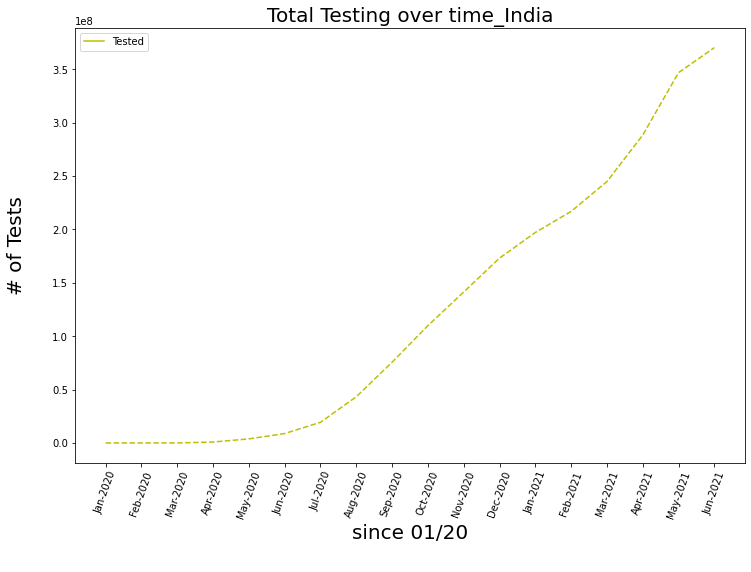

In [65]:
plot_monthly_ind('Tested')


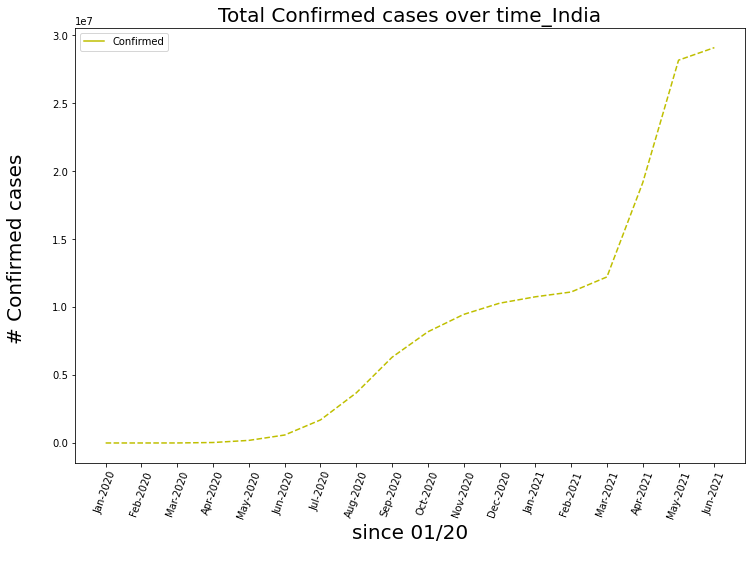

In [66]:
plot_monthly_ind('Confirmed')

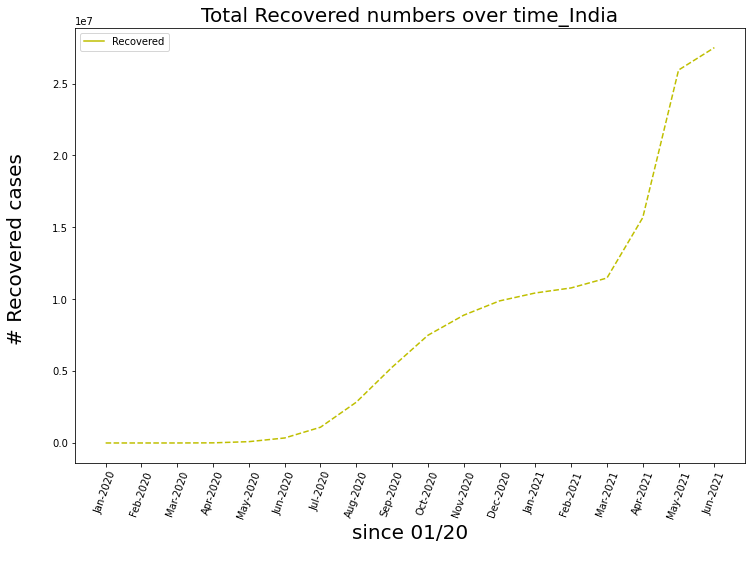

In [67]:
plot_monthly_ind('Recovered')

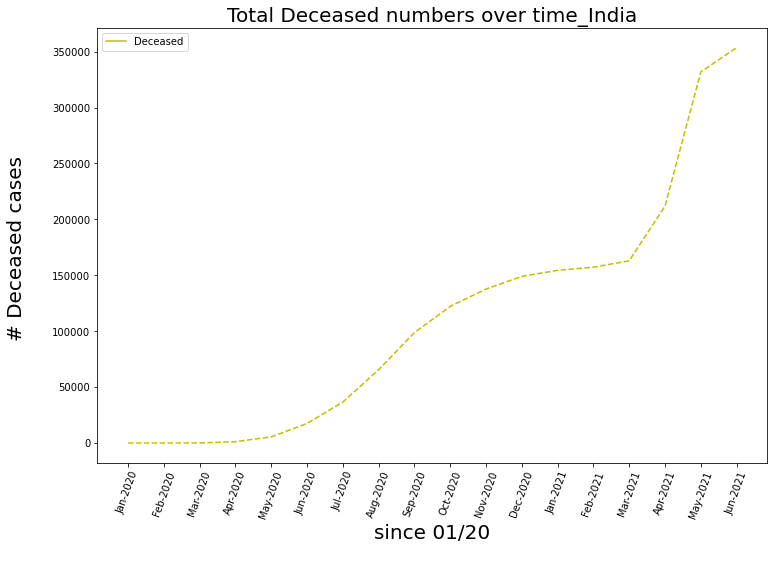

In [68]:
plot_monthly_ind('Deceased')

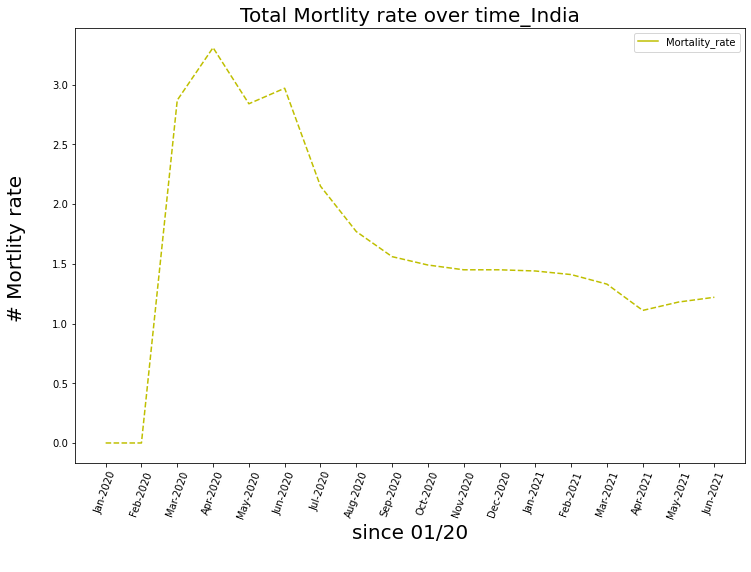

In [69]:
plot_monthly_ind('Mortality_rate')

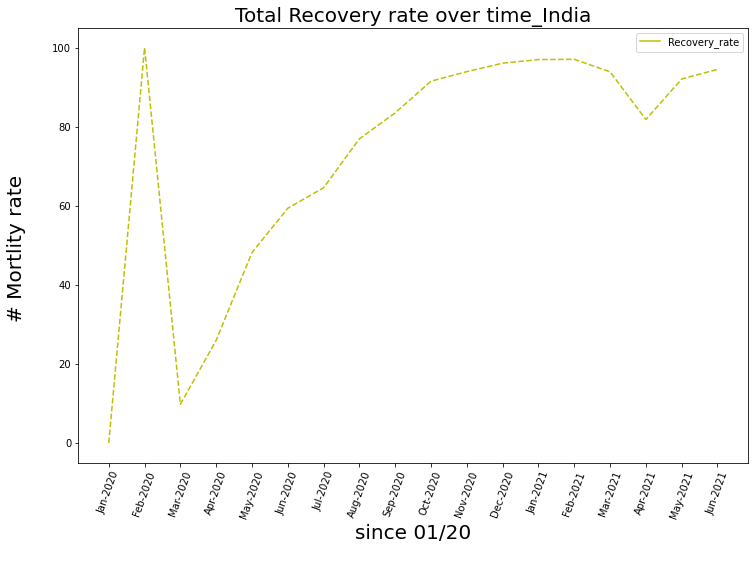

In [70]:
plot_monthly_ind('Recovery_rate')

In [71]:
df_india

Date  State  Confirmed  Recovered  Deceased  Other       Tested  \
0   Jan-2020  India          1          0         0      0          0.0   
1   Feb-2020  India          3          3         0      0          0.0   
2   Mar-2020  India       1635        160        47      3      42788.0   
3   Apr-2020  India      34867       9059      1154      4     902654.0   
4   May-2020  India     190648      91862      5405     13    3837207.0   
5   Jun-2020  India     585791     347841     17410     67    8826585.0   
6   Jul-2020  India    1697054    1095549     36556    421   19358659.0   
7   Aug-2020  India    3687942    2837381     65435    585   43324834.0   
8   Sep-2020  India    6310266    5270015     98708    900   75619781.0   
9   Oct-2020  India    8183396    7489593    122151   1428  109887303.0   
10  Nov-2020  India    9463256    8888595    137659   2194  141349301.0   
11  Dec-2020  India   10286312    9881732    149018   2861  173111694.0   
12  Jan-2021  India   10758629   10434007    154428   4509  197092635.0   
13  Feb-2021  India   11112057   10784568    157194   4578  216858774.0   
14  Mar-2021  India   12220717   11472500    162960   4870  244798621.0   
15  Apr-2021  India   19157196   15673250    211839   8293  288337385.0   
16  May-2021  India   28173883   25939750    331911  11273  346792257.0   
17  Jun-2021  India   29096415   27498939    353626  11651  370193563.0   

     Active  Mortality_rate  Recovery_rate  
0         1            0.00           0.00  
1         0            0.00         100.00  
2      1428            2.87           9.79  
3     24654            3.31          25.98  
4     93381            2.84          48.18  
5    220540            2.97          59.38  
6    564949            2.15          64.56  
7    785126            1.77          76.94  
8    941543            1.56          83.51  
9    571652            1.49          91.52  
10   437002            1.45          93.93  
11   255562            1.45          96.07  
12   170194            1.44          96.98  
13   170295            1.41          97.05  
14   585257            1.33          93.88  
15  3272107            1.11          81.81  
16  1902222            1.18          92.07  
17  1243850            1.22          94.51

In [72]:
df1 = df_india.melt(id_vars='Date', value_vars=['Confirmed','Deceased','Recovered'], 
                 var_name='Cases', value_name='Cases Count')
fig = px.line(df1, x="Date", y="Cases Count",color='Cases')
fig.update_layout(title="India Covid-19 Daily Cases", xaxis_title="", yaxis_title="")
fig.show()

In [73]:
df_state_ind=df_states[df_states['State']!='India']

In [74]:
fig = px.line(df_state_ind,x='Date', y='Confirmed', color='State',title='India growth COVID19 Cases ')
fig.show()

In [75]:
df_state1

State Confirmed Recovered Deceased  \
0                Andaman and Nicobar Islands      7154      6935      125   
1                             Andhra Pradesh   1771007   1651790    11629   
2                          Arunachal Pradesh     30000     26569      126   
3                                      Assam    442694    388451     3738   
4                                      Bihar    714590    701234     5458   
5                                 Chandigarh     60778     59314      779   
6                               Chhattisgarh    982962    950234    13257   
7   Dadra and Nagar Haveli and Daman and Diu     10429     10221        4   
8                                      Delhi   1429791   1400161    24668   
9                                        Goa    160284    151526     2859   
10                                   Gujarat    817707    793028     9955   
11                                   Haryana    763566    747246     8789   
12                          Himachal Pradesh    196357    186052     3312   
13                         Jammu and Kashmir    302651    276733     4101   
14                                 Jharkhand    342179    332007     5073   
15                                 Karnataka   2717289   2460165    32099   
16                                    Kerala   2657962   2504011    10281   
17                                    Ladakh     19330     18194      195   
18                               Lakshadweep      8874      7910       42   
19                            Madhya Pradesh    786302    769914     8405   
20                               Maharashtra   5852891   5580925   101172   
21                                   Manipur     56576     46527      908   
22                                 Meghalaya     39983     34440      694   
23                                   Mizoram     14196     10769       57   
24                                  Nagaland     23051     17296      432   
25                                    Odisha    831129    756641     3176   
26                                Puducherry    110748    102247     1648   
27                                    Punjab    582081    548316    15219   
28                                 Rajasthan    947504    925161     8719   
29                                    Sikkim     17656     13265      276   
30                          State Unassigned       163         0        0   
31                                Tamil Nadu   2274704   2028344    27765   
32                                 Telangana    595000    567285     3409   
33                                   Tripura     56791     50380      574   
34                             Uttar Pradesh   1699788   1664296    21425   
35                               Uttarakhand    334965    310291     6797   
36                               West Bengal   1437446   1401061    16460   

    Mortality_rate  Recovery_rate      Tested       Date   Other  Active  
0             1.75          96.94    392095.0 2021-06-09     0.0      94  
1             0.66          93.27  19946253.0 2021-06-09     0.0  107588  
2             0.42          88.56    645249.0 2021-06-09     0.0    3305  
3             0.84          87.75  11941949.0 2021-06-09  1347.0   50505  
4             0.76          98.13  30776332.0 2021-06-09     1.0    7898  
5             1.28          97.59    528002.0 2021-06-09     0.0     685  
6             1.35          96.67   9531682.0 2021-06-09     0.0   19471  
7             0.04          98.01     72410.0 2021-06-09    31.0     204  
8             1.73          97.93  19893804.0 2021-06-09     0.0    4962  
9             1.78          94.54    851801.0 2021-06-09     0.0    5899  
10            1.22          96.98  22381707.0 2021-06-09     0.0   14724  
11            1.15          97.86   9357916.0 2021-06-09     0.0    7531  
12            1.69          94.75   2057123.0 2021-06-09    23.0    6993  
13            1.36          91.44   8932882.0 2021-06-09     0

In [96]:
def plot_hbar(df_state1, col, n, hover_data=[]):
    fig = px.bar(df_state1.sort_values(col).tail(n), 
                 x=col  , y="State", color='State',  
                 text=col, orientation='h', width=700, hover_data=hover_data,
                 color_discrete_sequence = px.colors.qualitative.Dark24)
    fig.update_layout(title=col, xaxis_title="Total Cases", yaxis_title="Top "+ str(n) +"  States", 
                      yaxis_categoryorder = 'total ascending',
                      uniformtext_minsize=8, uniformtext_mode='hide')
    fig.show()

In [97]:
plot_hbar(df_state1, 'Recovered', 10)

In [98]:
plot_hbar(df_state1, 'Confirmed', 10)

In [99]:
plot_hbar(df_state1, 'Active', 10)

In [100]:
def daily_ind (x):
    plt.subplots(figsize=(12,8))
    if x=='Confirmed':
        ax=sns.barplot(x='Date',y='TT',data=conf_df,color='lightblue')
        plt.title('India Daily Increases in Confirmed Cases', size=20)        
    elif x=='Recovered':
        ax=sns.barplot(x='Date',y='TT',data=rec_df,color='lightblue')
        plt.title('India Daily Increases in Recovered Cases', size=20)
    elif x=='Deceased':
        ax=sns.barplot(x='Date',y='TT',data=dec_df,color='lightblue')
        plt.title('India Daily Increases in Death Cases', size=20)
        
    ysmoothed = gaussian_filter1d(conf_df['TT'], sigma=4)
    plt.plot(conf_df['Date'], ysmoothed,linestyle='dashed',color='darkred',dashes=(5,2),lw=2.5)
    every_nth = 20
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)

    
    plt.xlabel('Since 01/20', size=20)
    plt.ylabel('No. of Cases', size=20)
    plt.xticks(size=10,rotation=70)
    plt.yticks(size=10)
    plt.tight_layout()
    plt.show()

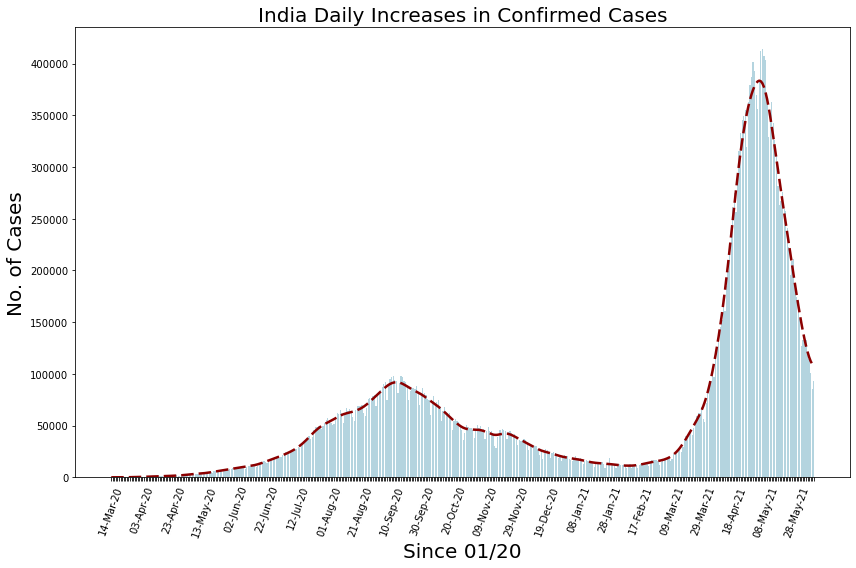

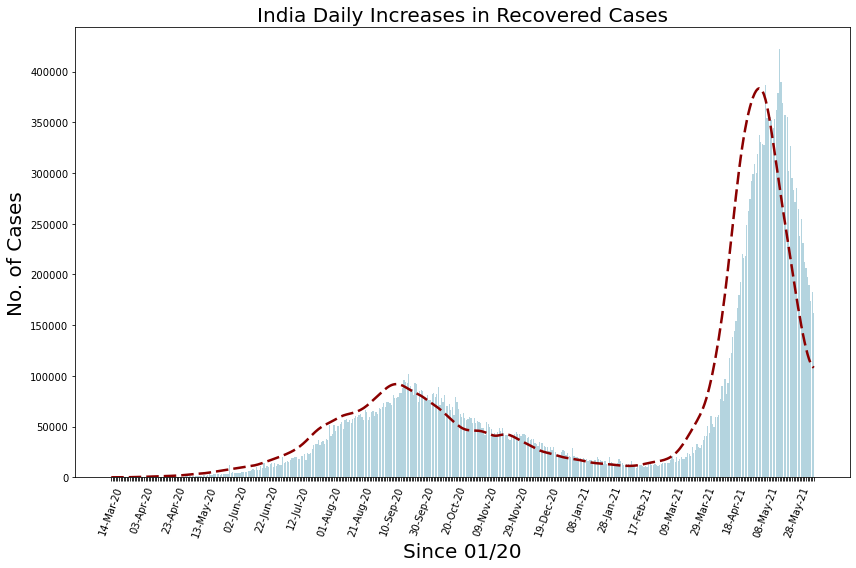

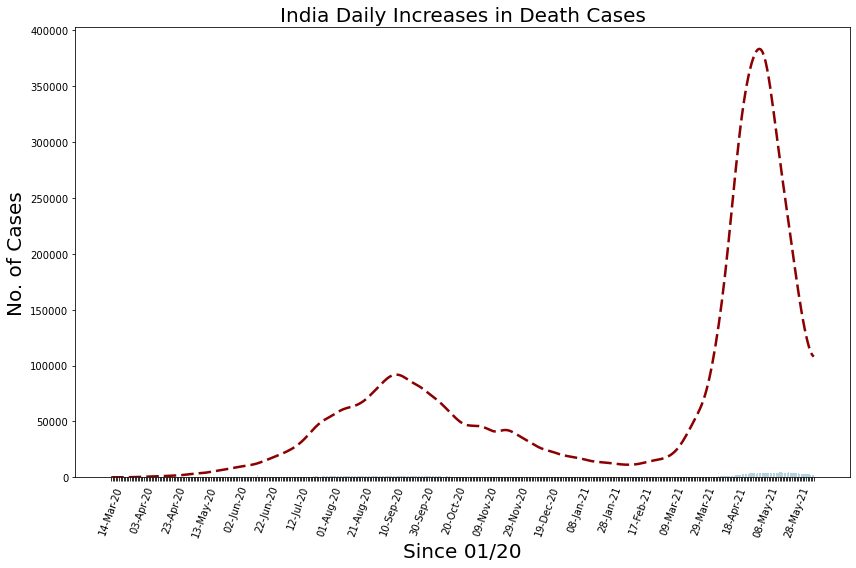

In [102]:
daily_ind('Confirmed')
daily_ind('Recovered')
daily_ind('Deceased')

In [103]:
ind_active=df_india['Active'].iloc[df_india.shape[0]-1]
ind_deceased=df_india['Deceased'].iloc[df_india.shape[0]-1]
ind_recovered=df_india['Recovered'].iloc[df_india.shape[0]-1]

In [104]:
import plotly.graph_objects as go

colors=['lightgreen','mediumturquoise','darkorange']
labels = ['Active','Recovered','Deceased']
values = [ind_active,ind_recovered,ind_deceased]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3,hoverinfo='label+percent')])
fig.update_traces(marker=dict(colors=colors,line=dict(color='#000000', width=0.8)))
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))
fig.show()

In [145]:
df_state1 = pd.DataFrame(columns = ['State', 'Confirmed','Recovered', 'Deceased', 'Mortality_rate','Recovery_rate','Tested']) 
#prepare states data 
for i in states_all:
    if (i!='India'):
        state_data = df_states[df_states['State']==i].tail(1)
        df_state1= df_state1.append(state_data)  

df_state1['Mortality_rate'] = df_state1[['Deceased','Confirmed']].apply(mortality_rate, axis=1)
df_state1['Recovery_rate'] = df_state1[['Confirmed','Recovered']].apply(recovery_rate, axis=1) 
df_state1['Active']=df_state1[['Confirmed','Recovered','Deceased']].apply(fill_active,axis=1)        
        
        

In [146]:
df_state1

State Confirmed Recovered Deceased  \
16310               Andaman and Nicobar Islands      7154      6935      125   
16311                            Andhra Pradesh   1771007   1651790    11629   
16312                         Arunachal Pradesh     30000     26569      126   
16313                                     Assam    442694    388451     3738   
16314                                     Bihar    714590    701234     5458   
16315                                Chandigarh     60778     59314      779   
16316                              Chhattisgarh    982962    950234    13257   
16318  Dadra and Nagar Haveli and Daman and Diu     10429     10221        4   
16317                                     Delhi   1429791   1400161    24668   
16319                                       Goa    160284    151526     2859   
16320                                   Gujarat    817707    793028     9955   
16322                                   Haryana    763566    747246     8789   
16321                          Himachal Pradesh    196357    186052     3312   
16324                         Jammu and Kashmir    302651    276733     4101   
16323                                 Jharkhand    342179    332007     5073   
16325                                 Karnataka   2717289   2460165    32099   
16326                                    Kerala   2657962   2504011    10281   
16327                                    Ladakh     19330     18194      195   
16328                               Lakshadweep      8874      7910       42   
16332                            Madhya Pradesh    786302    769914     8405   
16329                               Maharashtra   5852891   5580925   101172   
16331                                   Manipur     56576     46527      908   
16330                                 Meghalaya     39983     34440      694   
16333                                   Mizoram     14196     10769       57   
16334                                  Nagaland     23051     17296      432   
16335                                    Odisha    831129    756641     3176   
16337                                Puducherry    110748    102247     1648   
16336                                    Punjab    582081    548316    15219   
16338                                 Rajasthan    947504    925161     8719   
16339                                    Sikkim     17656     13265      276   
4464                           State Unassigned       163         0        0   
16341                                Tamil Nadu   2274704   2028344    27765   
16340                                 Telangana    595000    567285     3409   
16342                                   Tripura     56791     50380      574   
16344                             Uttar Pradesh   1699788   1664296    21425   
16345                               Uttarakhand    334965    310291     6797   
16346                               West Bengal   1437446   1401061    16460   

       Mortality_rate  Recovery_rate      Tested       Date   Other  Active  
16310            1.75          96.94    392095.0 2021-06-09     0.0      94  
16311            0.66          93.27  19946253.0 2021-06-09     0.0  107588  
16312            0.42          88.56    645249.0 2021-06-09     0.0    3305  
16313            0.84          87.75  11941949.0 2021-06-09  1347.0   50505  
16314            0.76          98.13  30776332.0 2021-06-09     1.0    7898  
16315            1.28          97.59    528002.0 2021-06-09     0.0     685  
16316            1.35          96.67   9531682.0 2021-06-09     0.0   19471  
16318            0.04          98.01     72410.0 2021-06-09    31.0     204  
16317            1.73          97.93  19893804.0 2021-06-09     0.0    4962  
16319            1.78          94.54    851801.0 2021-06-09     0.0    5899  
16320            1.22          96.98  22381707.0 2021-06-09     0.0   14724  
16322            1.15          97.86   9357916.0 2021-06-09     0

In [150]:
df_state1.sort_values('Confirmed', ascending= False).set_index("State").drop(columns=['Date','Other','Tested']).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deceased"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='Reds',subset=["Mortality_rate"])\
                        .background_gradient(cmap='Greens',subset=["Recovery_rate"])

In [157]:
df_state1 = df_state1.set_index('State')
df_state1

Confirmed Recovered Deceased  \
State                                                                   
Andaman and Nicobar Islands                   7154      6935      125   
Andhra Pradesh                             1771007   1651790    11629   
Arunachal Pradesh                            30000     26569      126   
Assam                                       442694    388451     3738   
Bihar                                       714590    701234     5458   
Chandigarh                                   60778     59314      779   
Chhattisgarh                                982962    950234    13257   
Dadra and Nagar Haveli and Daman and Diu     10429     10221        4   
Delhi                                      1429791   1400161    24668   
Goa                                         160284    151526     2859   
Gujarat                                     817707    793028     9955   
Haryana                                     763566    747246     8789   
Himachal Pradesh                            196357    186052     3312   
Jammu and Kashmir                           302651    276733     4101   
Jharkhand                                   342179    332007     5073   
Karnataka                                  2717289   2460165    32099   
Kerala                                     2657962   2504011    10281   
Ladakh                                       19330     18194      195   
Lakshadweep                                   8874      7910       42   
Madhya Pradesh                              786302    769914     8405   
Maharashtra                                5852891   5580925   101172   
Manipur                                      56576     46527      908   
Meghalaya                                    39983     34440      694   
Mizoram                                      14196     10769       57   
Nagaland                                     23051     17296      432   
Odisha                                      831129    756641     3176   
Puducherry                                  110748    102247     1648   
Punjab                                      582081    548316    15219   
Rajasthan                                   947504    925161     8719   
Sikkim                                       17656     13265      276   
State Unassigned                               163         0        0   
Tamil Nadu                                 2274704   2028344    27765   
Telangana                                   595000    567285     3409   
Tripura                                      56791     50380      574   
Uttar Pradesh                              1699788   1664296    21425   
Uttarakhand                                 334965    310291     6797   
West Bengal                                1437446   1401061    16460   

                                          Mortality_rate  Recovery_rate  \
State                                                                     
Andaman and Nicobar Islands                         1.75          96.94   
Andhra Pradesh                                      0.66          93.27   
Arunachal Pradesh                                   0.42          88.56   
Assam                                               0.84          87.75   
Bihar                                               0.76          98.13   
Chandigarh                                          1.28          97.59   
Chhattisgarh                                        1.35          96.67   
Dadra and Nagar Haveli and Daman and Diu            0.04          98.01   
Delhi                                               1.73          97.93   
Goa                                                 1.78          94.54   
Gujarat                                             1.22          96.98   
Haryana                                             1.15          97.86   
Himachal Pradesh                                    1.69          94.75   
Jammu and Kashmir                                   1.36          91

In [ ]:
def daily_plot(x):
    plot = df_state1.plot.pie(y=x, legend=True,autopct='%1.2f%%',  startangle=270 ,figsize=(28, 18))

### Spread of Virus among different states

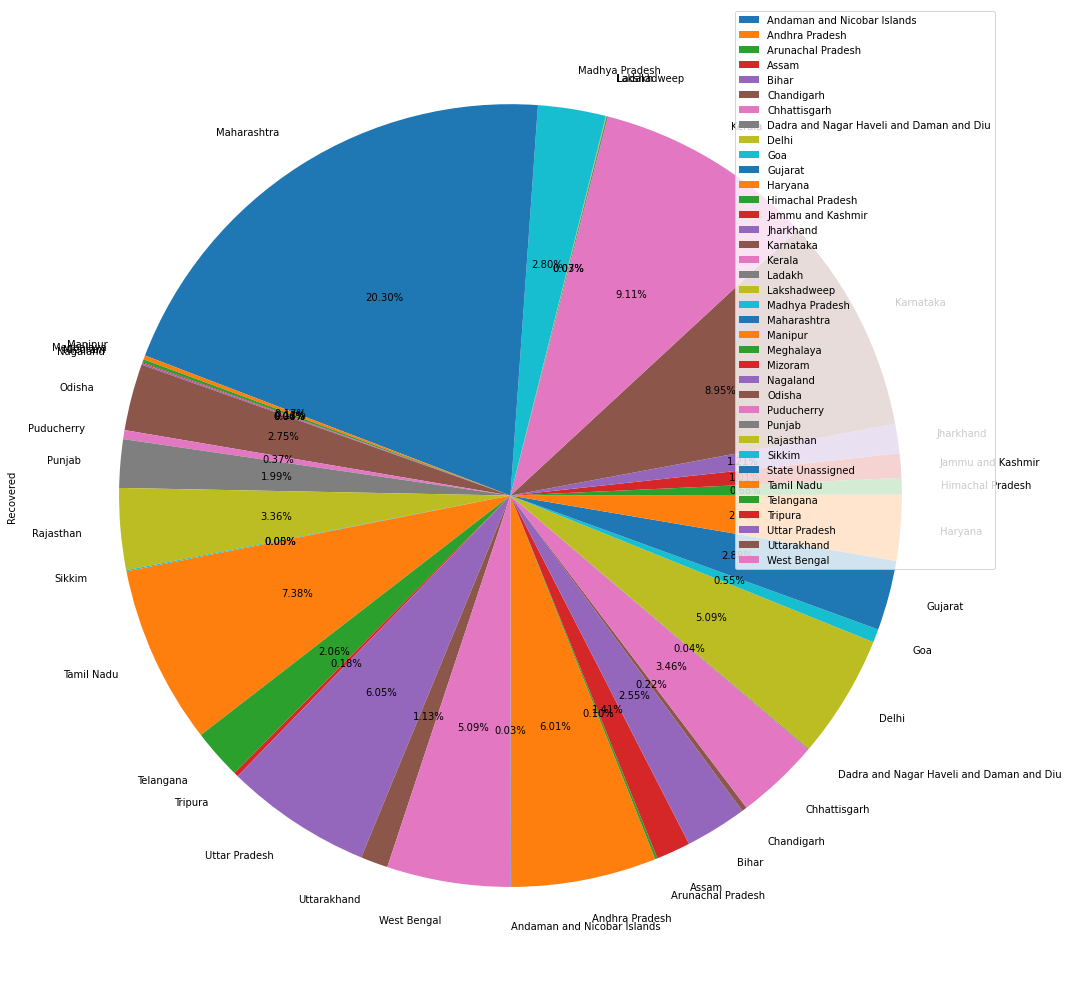

In [159]:
daily_plot('Recovered')


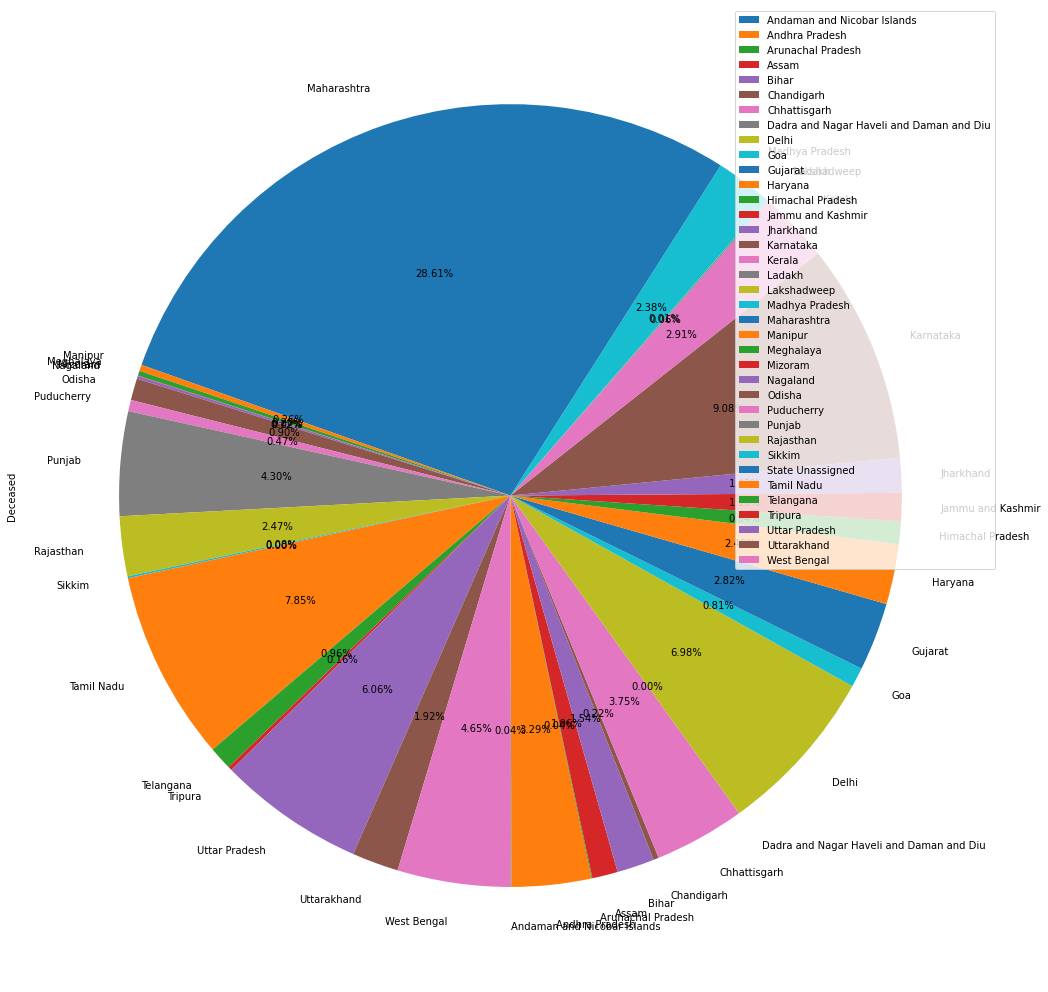

In [162]:
daily_plot('Deceased')

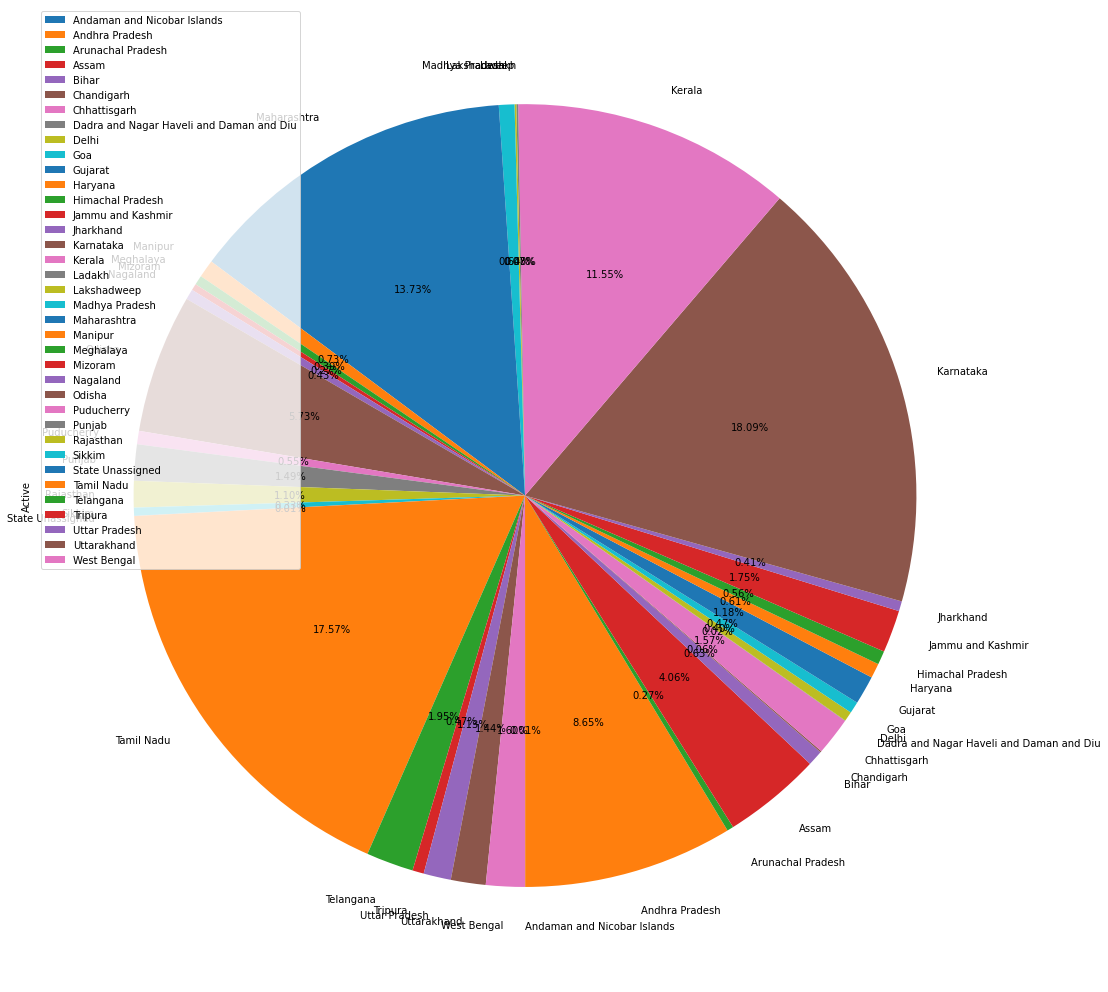

In [163]:
daily_plot('Active')

In [114]:
df_ap = df_state[df_state['State']=='Andhra Pradesh']
df_ap.shape

(455, 10)

In [115]:
corona_data = df_ap[['Date','Deceased']]
corona_data
corona_data['Deceased']=corona_data['Deceased'].sub(corona_data['Deceased'].shift())
corona_data['Deceased'].iloc[0]
corona_data['Deceased']=corona_data['Deceased'].fillna(0)
corona_data['Deceased'] = corona_data['Deceased'].astype(int)

In [116]:
fig = px.bar(corona_data, y='Deceased', x='Date',hover_data =['Deceased'], color='Deceased', height=600,color_continuous_scale=["blue","red"])
fig.update_layout(
    title='DAILY DEATHS IN Andhra Pradesh')
fig.show()

In [117]:
fig = px.bar(df_india[['Date','Active']], y='Active', x='Date',hover_data =['Active'], color='Active', height=600,color_continuous_scale=["blue","red"])
fig.update_layout(
    title='DAILY Active  in India')
fig.show()

In [119]:
df_state_top = df_state1.sort_values('Confirmed', ascending= False).head(10)
df_state_top

State Confirmed Recovered Deceased  Mortality_rate  \
16329     Maharashtra   5852891   5580925   101172            1.73   
16325       Karnataka   2717289   2460165    32099            1.18   
16326          Kerala   2657962   2504011    10281            0.39   
16341      Tamil Nadu   2274704   2028344    27765            1.22   
16311  Andhra Pradesh   1771007   1651790    11629            0.66   
16344   Uttar Pradesh   1699788   1664296    21425            1.26   
16346     West Bengal   1437446   1401061    16460            1.15   
16317           Delhi   1429791   1400161    24668            1.73   
16316    Chhattisgarh    982962    950234    13257            1.35   
16338       Rajasthan    947504    925161     8719            0.92   

       Recovery_rate      Tested       Date   Other  Active  
16329          95.35  36907181.0 2021-06-09  2867.0  170794  
16325          90.54  30862227.0 2021-06-09    21.0  225025  
16326          94.21  20688146.0 2021-06-09   421.0  143670  
16341          89.17  29062609.0 2021-06-09     0.0  218595  
16311          93.27  19946253.0 2021-06-09     0.0  107588  
16344          97.91  51907814.0 2021-06-09     0.0   14067  
16346          97.47  12979963.0 2021-06-09     0.0   19925  
16317          97.93  19893804.0 2021-06-09     0.0    4962  
16316          96.67   9531682.0 2021-06-09     0.0   19471  
16338          97.64  10974792.0 2021-06-09     0.0   13624

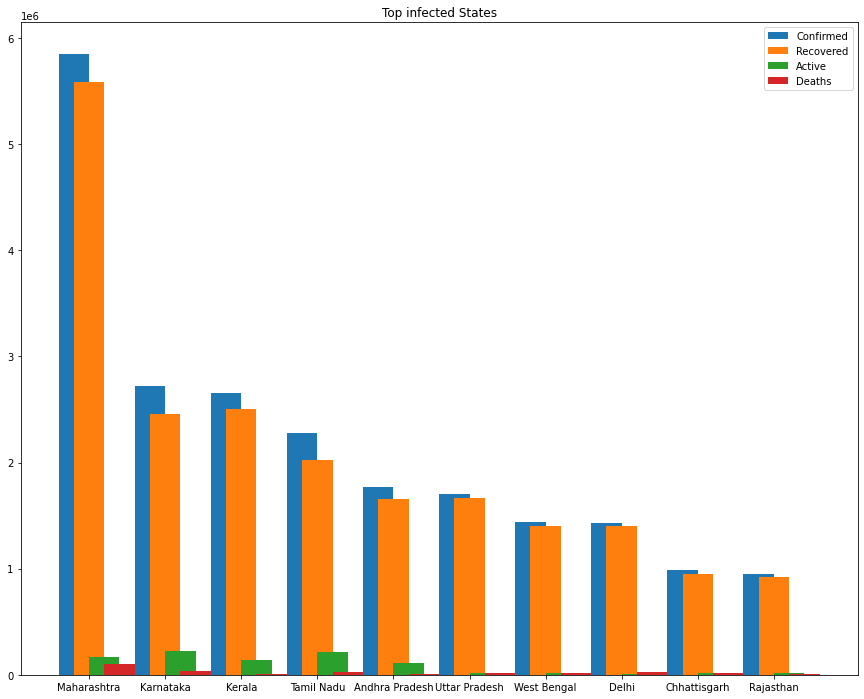

In [126]:
#visualizing the data of the top 20 states
import numpy as np
# Position of bars on x-axis
ind = np.arange(10)

# Width of a bar 
width = 0.4

plt.figure(figsize=(15,12))
x = df_state_top['State']
y = df_state_top['Confirmed']
plt.bar(ind+width/2,y,align='edge',width=width,label="Confirmed")
y = df_state_top['Recovered']
plt.bar(ind+width,y,align='edge',width=width,label="Recovered")
y = df_state_top['Active']
plt.bar(ind+3*width/2,y,align='edge',width=width,label="Active")
y = df_state_top['Deceased']
plt.bar(ind+2*width,y,align='edge',width=width,label="Deaths")



plt.xticks(ind + 3*width/2, x)
plt.title("Top infected States")

plt.legend();

In [138]:
df_state1

Confirmed Recovered Deceased  \
State                                                                   
Andaman and Nicobar Islands                   7154      6935      125   
Andhra Pradesh                             1771007   1651790    11629   
Arunachal Pradesh                            30000     26569      126   
Assam                                       442694    388451     3738   
Bihar                                       714590    701234     5458   
Chandigarh                                   60778     59314      779   
Chhattisgarh                                982962    950234    13257   
Dadra and Nagar Haveli and Daman and Diu     10429     10221        4   
Delhi                                      1429791   1400161    24668   
Goa                                         160284    151526     2859   
Gujarat                                     817707    793028     9955   
Haryana                                     763566    747246     8789   
Himachal Pradesh                            196357    186052     3312   
Jammu and Kashmir                           302651    276733     4101   
Jharkhand                                   342179    332007     5073   
Karnataka                                  2717289   2460165    32099   
Kerala                                     2657962   2504011    10281   
Ladakh                                       19330     18194      195   
Lakshadweep                                   8874      7910       42   
Madhya Pradesh                              786302    769914     8405   
Maharashtra                                5852891   5580925   101172   
Manipur                                      56576     46527      908   
Meghalaya                                    39983     34440      694   
Mizoram                                      14196     10769       57   
Nagaland                                     23051     17296      432   
Odisha                                      831129    756641     3176   
Puducherry                                  110748    102247     1648   
Punjab                                      582081    548316    15219   
Rajasthan                                   947504    925161     8719   
Sikkim                                       17656     13265      276   
State Unassigned                               163         0        0   
Tamil Nadu                                 2274704   2028344    27765   
Telangana                                   595000    567285     3409   
Tripura                                      56791     50380      574   
Uttar Pradesh                              1699788   1664296    21425   
Uttarakhand                                 334965    310291     6797   
West Bengal                                1437446   1401061    16460   

                                          Mortality_rate  Recovery_rate  \
State                                                                     
Andaman and Nicobar Islands                         1.75          96.94   
Andhra Pradesh                                      0.66          93.27   
Arunachal Pradesh                                   0.42          88.56   
Assam                                               0.84          87.75   
Bihar                                               0.76          98.13   
Chandigarh                                          1.28          97.59   
Chhattisgarh                                        1.35          96.67   
Dadra and Nagar Haveli and Daman and Diu            0.04          98.01   
Delhi                                               1.73          97.93   
Goa                                                 1.78          94.54   
Gujarat                                             1.22          96.98   
Haryana                                             1.15          97.86   
Himachal Pradesh                                    1.69          94.75   
Jammu and Kashmir                                   1.36          91

In [135]:
df_state1=df_state1.set_index('State')

In [160]:
df_state1

Confirmed Recovered Deceased  \
State                                                                   
Andaman and Nicobar Islands                   7154      6935      125   
Andhra Pradesh                             1771007   1651790    11629   
Arunachal Pradesh                            30000     26569      126   
Assam                                       442694    388451     3738   
Bihar                                       714590    701234     5458   
Chandigarh                                   60778     59314      779   
Chhattisgarh                                982962    950234    13257   
Dadra and Nagar Haveli and Daman and Diu     10429     10221        4   
Delhi                                      1429791   1400161    24668   
Goa                                         160284    151526     2859   
Gujarat                                     817707    793028     9955   
Haryana                                     763566    747246     8789   
Himachal Pradesh                            196357    186052     3312   
Jammu and Kashmir                           302651    276733     4101   
Jharkhand                                   342179    332007     5073   
Karnataka                                  2717289   2460165    32099   
Kerala                                     2657962   2504011    10281   
Ladakh                                       19330     18194      195   
Lakshadweep                                   8874      7910       42   
Madhya Pradesh                              786302    769914     8405   
Maharashtra                                5852891   5580925   101172   
Manipur                                      56576     46527      908   
Meghalaya                                    39983     34440      694   
Mizoram                                      14196     10769       57   
Nagaland                                     23051     17296      432   
Odisha                                      831129    756641     3176   
Puducherry                                  110748    102247     1648   
Punjab                                      582081    548316    15219   
Rajasthan                                   947504    925161     8719   
Sikkim                                       17656     13265      276   
State Unassigned                               163         0        0   
Tamil Nadu                                 2274704   2028344    27765   
Telangana                                   595000    567285     3409   
Tripura                                      56791     50380      574   
Uttar Pradesh                              1699788   1664296    21425   
Uttarakhand                                 334965    310291     6797   
West Bengal                                1437446   1401061    16460   

                                          Mortality_rate  Recovery_rate  \
State                                                                     
Andaman and Nicobar Islands                         1.75          96.94   
Andhra Pradesh                                      0.66          93.27   
Arunachal Pradesh                                   0.42          88.56   
Assam                                               0.84          87.75   
Bihar                                               0.76          98.13   
Chandigarh                                          1.28          97.59   
Chhattisgarh                                        1.35          96.67   
Dadra and Nagar Haveli and Daman and Diu            0.04          98.01   
Delhi                                               1.73          97.93   
Goa                                                 1.78          94.54   
Gujarat                                             1.22          96.98   
Haryana                                             1.15          97.86   
Himachal Pradesh                                    1.69          94.75   
Jammu and Kashmir                                   1.36          91

In [167]:
df_states

Date          State  Confirmed  Recovered  Deceased  Other  \
0     2020-01-30         Kerala          1          0         0      0   
1     2020-01-30          India          1          0         0      0   
2     2020-02-02         Kerala          2          0         0      0   
3     2020-02-02          India          2          0         0      0   
4     2020-02-03         Kerala          3          0         0      0   
...          ...            ...        ...        ...       ...    ...   
16342 2021-06-09        Tripura      56791      50380       574     23   
16343 2021-06-09          India   29096415   27498939    353626  11651   
16344 2021-06-09  Uttar Pradesh    1699788    1664296     21425      0   
16345 2021-06-09    Uttarakhand     334965     310291      6797   5992   
16346 2021-06-09    West Bengal    1437446    1401061     16460      0   

            Tested  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  
...            ...  
16342    1071999.0  
16343  370193563.0  
16344   51907814.0  
16345    5004569.0  
16346   12979963.0  

[16347 rows x 7 columns]

In [177]:
temp = df_states[df_states['Date'] > '2020-01-01']

fig = px.line(temp,x='Date', y='Confirmed',color='State')
fig.update_layout(title='Timeline of confirmation of cases in India', 
                  xaxis_title='Date', yaxis_title='Confirmed cases' , width=1200, height=1000 )

fig.add_trace(go.Scatter(x=temp['Date'], y=[500]*len(temp), 
                          mode='lines', name='500 count line', 
                          line = dict(dash='dash',color='gray')))

fig.add_trace(go.Scatter(x=temp['Date'], y=[1000]*len(temp), 
                          mode='lines', name='1000 count line', 
                          line = dict(dash='dash',color='maroon')))

fig.add_trace(go.Scatter(x=temp['Date'], y=[1500]*len(temp), 
                          mode='lines', name='1000 count line', 
                          line = dict(dash='dash',color='black')))
fig.show()

In [192]:
!pip install geopandas 
#import geopandas as gpd

  Using cached geopandas-0.9.0-py2.py3-none-any.whl (994 kB)
  Using cached Shapely-1.7.1-cp38-cp38-win_amd64.whl (1.0 MB)
  Using cached Fiona-1.8.20.tar.gz (1.3 MB)


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\Divya\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Divya\\AppData\\Local\\Temp\\pip-install-1koxvm6u\\fiona\\setup.py'"'"'; __file__='"'"'C:\\Users\\Divya\\AppData\\Local\\Temp\\pip-install-1koxvm6u\\fiona\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Divya\AppData\Local\Temp\pip-pip-egg-info-khv95lat'
         cwd: C:\Users\Divya\AppData\Local\Temp\pip-install-1koxvm6u\fiona\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command out

In [193]:
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'

In [187]:
# reading the shape file of map of India in GeoDataFrame
map_data = gpd.read_file('Igismap\Indian_States.shp')
#map_data.rename(columns = {‘st_nm’:’States/UT’}, inplace = True)
map_data.head()

NameError: name 'gpd' is not defined